In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("house_prices_selection.csv")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVI                1168 non-null   float64
 1   ZoningScore        1168 non-null   float64
 2   MSZoning_RL        1168 non-null   object 
 3   LotConfig_CulDSac  1168 non-null   object 
 4   LandContour_HLS    1168 non-null   object 
 5   LotShape_IR2       1168 non-null   object 
 6   Condition1_Norm    1168 non-null   object 
 7   MSZoning_FV        1168 non-null   object 
 8   Condition1_Feedr   1168 non-null   object 
 9   LotShape_Reg       1168 non-null   object 
 10  MSZoning_RM        1168 non-null   object 
 11  Price_per_m^2      1168 non-null   float64
 12  PDI                1168 non-null   float64
 13  SalePrice          1460 non-null   int64  
 14  LotFrontage        1201 non-null   float64
 15  LotArea            1460 non-null   int64  
 16  WoodDeckSF         1460 

In [4]:
data.describe().T[['mean', '50%', 'std']]

,mean,50%,std
EVI,0.380968,0.370041,0.103603
ZoningScore,0.724731,0.795605,0.191092
Price_per_m^2,224.816818,191.302979,131.121509
PDI,0.392821,0.378316,0.090498
SalePrice,180921.195890,163000.000000,79442.502883
LotFrontage,70.049958,69.000000,24.284752
LotArea,10516.828082,9478.500000,9981.264932
WoodDeckSF,94.244521,0.000000,125.338794
OpenPorchSF,46.660274,25.000000,66.256028
FullBath,1.565068,2.000000,0.550916


In [5]:
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("numeric columns:", len(numeric_cols))
print("categorical columns:", len(categorical_cols))

numeric columns: 19
categorical columns: 14


In [6]:
data.isnull().sum()

,0
EVI,292
ZoningScore,292
MSZoning_RL,292
LotConfig_CulDSac,292
LandContour_HLS,292
LotShape_IR2,292
Condition1_Norm,292
MSZoning_FV,292
Condition1_Feedr,292
LotShape_Reg,292


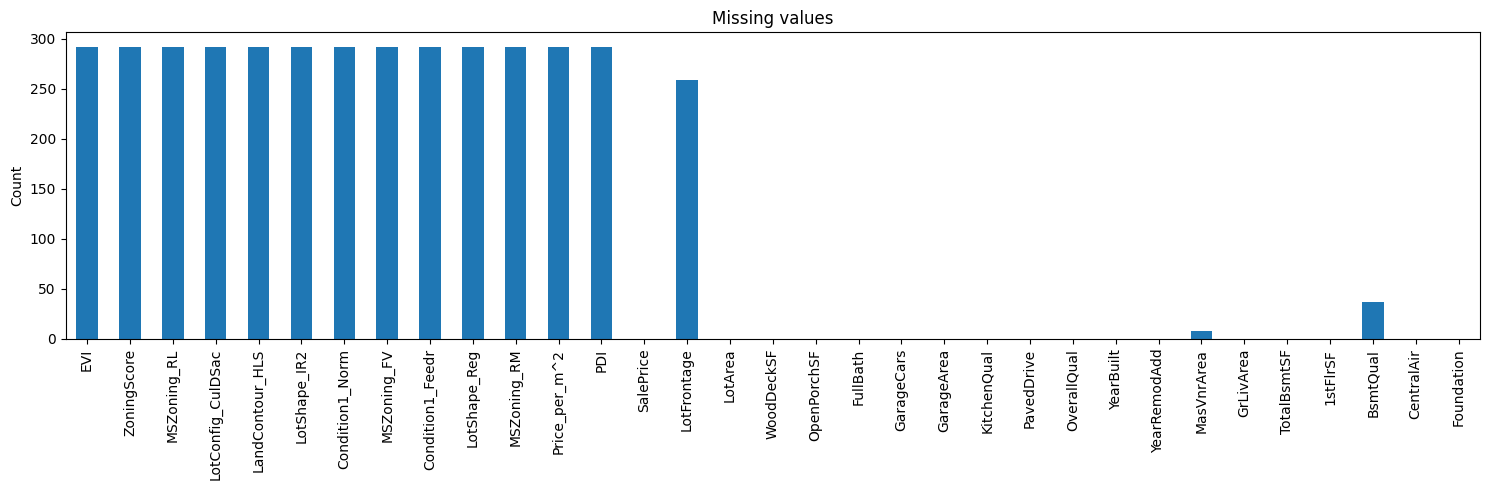

In [10]:
plt.figure(figsize=(15, 5))
data.isnull().sum().plot(kind='bar')
plt.title("Missing values")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
if "SalePrice" in numeric_cols:
    pearson_corr = data[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)
    print("\nCorelația Pearson cu SalePrice:\n")
    print(pearson_corr)


Corelația Pearson cu SalePrice:

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
LotFrontage      0.351799
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
PDI             -0.000689
ZoningScore     -0.010706
EVI             -0.023379
Price_per_m^2   -0.034173
Name: SalePrice, dtype: float64


Based on the exploratory analysis, the selected variables appear well-suited for a linear regression model predicting house prices.

The strongest predictors—such as OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, and 1stFlrSF—show high positive correlations with SalePrice, confirming well-established relationships between home quality, living space, and market value.

Additional features like FullBath, YearBuilt, YearRemodAdd, MasVnrArea, LotFrontage, and LotArea display moderate correlations and contribute relevant structural and temporal information.

Meanwhile, variables such as PDI, ZoningScore, EVI, and Price_per_m² show near-zero correlation or contain substantial missing values, making them less informative for prediction and therefore appropriate to remove.

Some columns feature a significant number of nulls (292, ~20% of rows) and should be dealt with accordingly.

Overall, the chosen feature set balances predictive strength, interpretability, and data quality, making it a strong foundation for building a reliable linear regression model.